### 자연어 처리 
- 자연어(NLP): 사람이 하는 말을 의미함
  -> 문법이 정해져 있지만 사람들은 문법이 틀려도 어느정도 이해할 수 있음
- 말뭉치 (corpus) : 문장들이 뭉쳐 있는것
- 일반적으로 단어를 숫자 데이터로 변경할 때, 단어마다 고유한 정수를 부여함
  -> 동일한 단어는 동일 정수에 매핑 됨
  -> 한글의 경우 공백으로 나누는 것만으로 처리하기는 어렵고 형태소 분석을 실시해야 함
- 기본 : RNN, transformer 등장 이후 대부분 transformer 활용 

### 데이터 활용 
- 영화리뷰 데이터: imdb.com


In [2]:
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=300)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(X_train.shape,X_test.shape )

(25000,) (25000,)


In [7]:
len(X_train[0]) 

218

In [8]:
len(X_train[1]) #각 리뷰데이터마다 길이가 다름 

189

In [9]:
X_train[0] #어휘사전을 300개만 사용했기 때문에 없는 것은 2로 표현됨 

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [11]:
y_train[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

#### 리뷰의 길이가 다른 것 확인 했기 때문에 해당 리뷰길이의 분포가 어떻게 되는지 중앙값과 평균, 시각화를 통해 확인하기 

In [13]:
import numpy as np
lengths = np.array([len(x) for x in X_train])

In [14]:
print(np.mean(lengths), np.median(lengths)) #평균이 중앙값 보다 높기 때문에 오른쪽 끝에 데이터가 치우쳐져 있음을 예측할 수 있음

239.00925 178.0


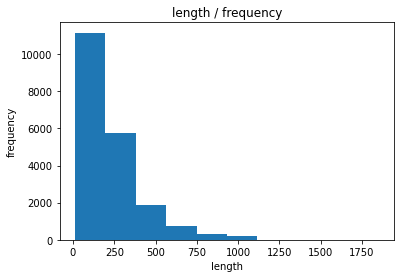

In [16]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.title('length / frequency' )
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #길이가 100이 되도록 패딩 
train_seq = pad_sequences(X_train, maxlen=100)

In [20]:
print(train_seq.shape) #파이썬 리스트 배열 -> 2차원 배열로 바뀜

(20000, 100)


In [21]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [23]:
print(X_train[0][-10:]) #슬라이싱해서 확인 해 본 결과 앞에서 데이터가 잘렸음을 확인 할 수 있음. 

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [26]:
print((train_seq[5])) #앞에 0값 들어간 것 확인해봤을 때 길이가 100 보다 작았다는 것 확인 할 수 있음 

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [28]:
val_seq = pad_sequences(X_val,maxlen=100)

#### 순환 신경망 만들기 

In [33]:
from tensorflow import keras 
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [35]:
#원핫 인코딩 실시 
train_oh = keras.utils.to_categorical(train_seq)

In [37]:
print(train_oh.shape)

(20000, 100, 300)


In [38]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [40]:
print(np.sum(train_oh[0][0])) #합이 1이 되는지 확인 

1.0


In [41]:
val_oh = keras.utils.to_categorical(val_seq)

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
rmsporp = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsporp, loss='binary_crossentropy',metrics=['accuracy'])
cb = keras.callbacks.ModelCheckpoint(
    'best_rnn.keras', save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(patience=3,
                                      restore_best_weights=True)
history = model.fit(train_oh,y_train, epochs=100, batch_size = 64,
                   validation_data = (val_oh, y_val),
                   callbacks = [cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5012 - loss: 0.7067 - val_accuracy: 0.5012 - val_loss: 0.7009
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.5066 - loss: 0.7007 - val_accuracy: 0.5040 - val_loss: 0.6980
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5107 - loss: 0.6971 - val_accuracy: 0.5052 - val_loss: 0.6958
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5211 - loss: 0.6941 - val_accuracy: 0.5074 - val_loss: 0.6941
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5284 - loss: 0.6911 - val_accuracy: 0.5140 - val_loss: 0.6926
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5298 - loss: 0.6901 - val_accuracy: 0.5206 - val_loss: 0.6916
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5341 - loss: 0.6894 - val_accuracy: 0.5268 - val_loss: 0.6906
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5454 - loss: 0.6868

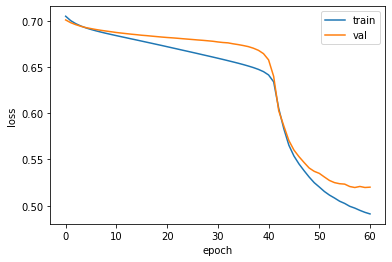

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 단어 임베딩 활용하기 
- 각 단어를 고정도니 크기의 실수 벡터로 바꾸어 줌 

In [55]:
model2= keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

C:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
rmsporp = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsporp, loss='binary_crossentropy',metrics=['accuracy'])
cb = keras.callbacks.ModelCheckpoint(
    'best_rnn_emb.keras', save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(patience=3,
                                      restore_best_weights=True)
history = model2.fit(train_seq ,y_train, epochs=100, batch_size = 64,
                   validation_data = (val_seq, y_val),
                   callbacks = [cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6360 - loss: 0.6548 - val_accuracy: 0.6670 - val_loss: 0.6364
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6856 - loss: 0.6260 - val_accuracy: 0.6714 - val_loss: 0.6259
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7073 - loss: 0.6042 - val_accuracy: 0.7178 - val_loss: 0.5914
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7284 - loss: 0.5831 - val_accuracy: 0.7252 - val_loss: 0.5779
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7363 - loss: 0.5687 - val_accuracy: 0.7288 - val_loss: 0.5650
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7442 - loss: 0.5553 - val_accuracy: 0.7450 - val_loss: 0.5502
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7446 - loss: 0.5474 - val_accuracy: 0.7442 - val_loss: 0.5446
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7514 - loss: 0.5358 - 

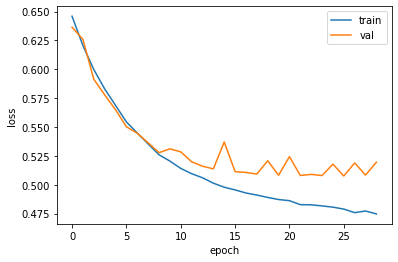

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()